# Матричное умножение

> **Выполнил:** Власов Максим Сергеевич, студент группы 3822М1ПМкн



## Условие задачи

Вычисление элементов произведения $C$ двух квадратных матриц $A=(a_{ij})$ и $B=(b_{ij})$ по формулам
$$
c_{ij} = \sum_{k=1}^n a_{ik} b_{kj} \qquad (i=1,2,\dots,n;~ j=1,2,\dots,n)
$$
легко реализуется с помощью трех вложенных циклов: по $i$, по $j$ и по $k$. Различные варианты алгоритма можно получить перестановкой циклов. Напишите шесть функций `multijk`, `multikj`, `multjik`, …, реализующих каждый из этих вариантов. Для серии случайно сгенерированных матриц больших размеров замерьте время, требуемое этими функциями и стандартной операцией `@`. Нарисуйте графики зависимости времени от порядка матриц. Объясните, почему требуется различное время на выполнение каждой из написанных вами функций.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter_ns
plt.rcParams["figure.figsize"] = (15, 15)


## Решение

Ниже приведены функции `mult*`, реализующие матричное умножение для квадратных матриц из целых чисел, представленных объектами `numpy.array` - двумерными массивами. Все они одинаковы, за исключением порядка переменных, по которым итерируются вложенные циклы.

Функция `numpy_default` использует оператор `@`, вызывающий умножение матриц с помощью numpy (`numpy.matmul`).

In [9]:
def try_get_dim(A, B) -> int:
    rows_a, cols_a = A.shape
    rows_b, cols_b = B.shape
    assert rows_a == cols_a and rows_b == cols_b and rows_a == rows_b and A.dtype == B.dtype
    return rows_a

def multijk(A, B):
    dim = A.shape[0]
    C = np.zeros(shape=(dim, dim), dtype=A.dtype)
    for i in range(dim):
        for j in range(dim):
            for k in range(dim):
                C[i, j] += A[i, k] * B[k, j] 
    return C

def multikj(A, B):
    dim = A.shape[0]
    C = np.zeros(shape=(dim, dim), dtype=A.dtype)
    for i in range(dim):
        for k in range(dim):
            for j in range(dim):
                C[i, j] += A[i, k] * B[k, j] 
    return C

def multjik(A, B):
    dim = A.shape[0]
    C = np.zeros(shape=(dim, dim), dtype=A.dtype)
    for j in range(dim):
        for i in range(dim):
            for k in range(dim):
                C[i, j] += A[i, k] * B[k, j] 
    return C

def multjki(A, B):
    dim = A.shape[0]
    C = np.zeros(shape=(dim, dim), dtype=A.dtype)
    for j in range(dim):
        for k in range(dim):
            for i in range(dim):
                C[i, j] += A[i, k] * B[k, j] 
    return C

def multkij(A, B):
    dim = A.shape[0]
    C = np.zeros(shape=(dim, dim), dtype=A.dtype)
    for k in range(dim):
        for i in range(dim):
            for j in range(dim):
                C[i, j] += A[i, k] * B[k, j] 
    return C

def multkji(A, B):
    dim = A.shape[0]
    C = np.zeros(shape=(dim, dim), dtype=A.dtype)
    for k in range(dim):
        for j in range(dim):
            for i in range(dim):
                C[i, j] += A[i, k] * B[k, j] 
    return C

def numpy_default(A, B): return A @ B

MULT_FUNCTIONS = (multijk, multikj, multjik, multjki, multkij, multkij, numpy_default)


## Функциональный тест

С помощью функционального теста можно проверить, что каждая из функций корректно выполняет матричное умножение. Сравнение производится для сгенерированных случайным образом матриц с результатом работы оператора `@`.

In [10]:
def run_functional_test(dim: int):
    gen = np.random.default_rng()
    A = gen.integers(-10, 11, size=(dim, dim), dtype="int32")
    B = gen.integers(-10, 11, size=(dim, dim), dtype="int32")
    C_expected = A @ B
    for mult in MULT_FUNCTIONS:
        C_actial = mult(A, B)
        print(mult.__name__, np.all(np.equal(C_actial, C_expected)))

run_functional_test(3)

multijk True
multikj True
multjik True
multjki True
multkij True
multkij True
numpy_default True


## Тесты производительности

Тесты производительности позволяют измерить время, затраченное на выполнение матричного умножения с помощью каждой из функций. Для удобства добавлен класс `Timer`, с помощью которого можно получить начало и конец временного отрезка во время измерения.

In [11]:
class Timer:
    def __init__(self):
        self.reset()
    def reset(self):
        self.stamp = perf_counter_ns()
    def elapsed(self):
        return perf_counter_ns() - self.stamp

def generate_matrices(dim: int):
    gen = np.random.default_rng()
    A = gen.integers(-10, 11, size=(dim, dim), dtype="int32")
    B = gen.integers(-10, 11, size=(dim, dim), dtype="int32")
    return A, B

def run_performance_test(dim: int):
    timer = Timer()
    A, B = generate_matrices(dim)
    results = {"dim": dim}
    for mult in MULT_FUNCTIONS:
        timer.reset()
        C = mult(A, B)
        elapsed = timer.elapsed()
        results[mult.__name__] = elapsed / 1e6
    return pd.DataFrame([results])

Тесты производились для сгенерированных случайным образом квадратных матриц размерности 3, 10, 20 и далее до 150. Численные результаты представлены в таблице ниже. Длительности указаны в миллисекундах.

In [12]:
results = pd.DataFrame()

dims = [3] + [i for i in range(10, 150+1, 10)]
for dim in dims:
    results = pd.concat([results, run_performance_test(dim)], ignore_index=True)

results

,dim,multijk,multikj,multjik,multjki,multkij,numpy_default
0,3,0.0190,0.0150,0.0145,0.0217,0.0141,0.0071
1,10,0.4472,0.4402,0.4534,0.4455,0.4435,0.0089
2,20,4.8730,3.5948,3.7704,3.6736,3.6845,0.0261
3,30,14.1580,13.3963,11.6023,13.3113,12.6022,0.0383
4,40,28.0282,28.7732,28.7502,29.4125,31.4671,0.0744
5,50,56.7633,55.0998,54.6021,56.7171,54.9446,0.1345
6,60,128.2067,95.5472,95.3434,98.4440,96.0015,0.2217
7,70,153.1221,152.6195,151.9580,157.9724,155.8552,0.3598
8,80,231.0957,257.8336,229.7938,243.1260,227.1323,0.5343
9,90,322.0755,350.5378,323.0511,319.9855,349.4537,0.8450


На изображении ниже приведены результаты из таблицы выше в виде графиков. Как можно заметить, все функции имеют похожие времена выполнения, хотя и незначительно отличающиеся, но все они при этом на несколько порядков медленнее, чем `numpy_default`.

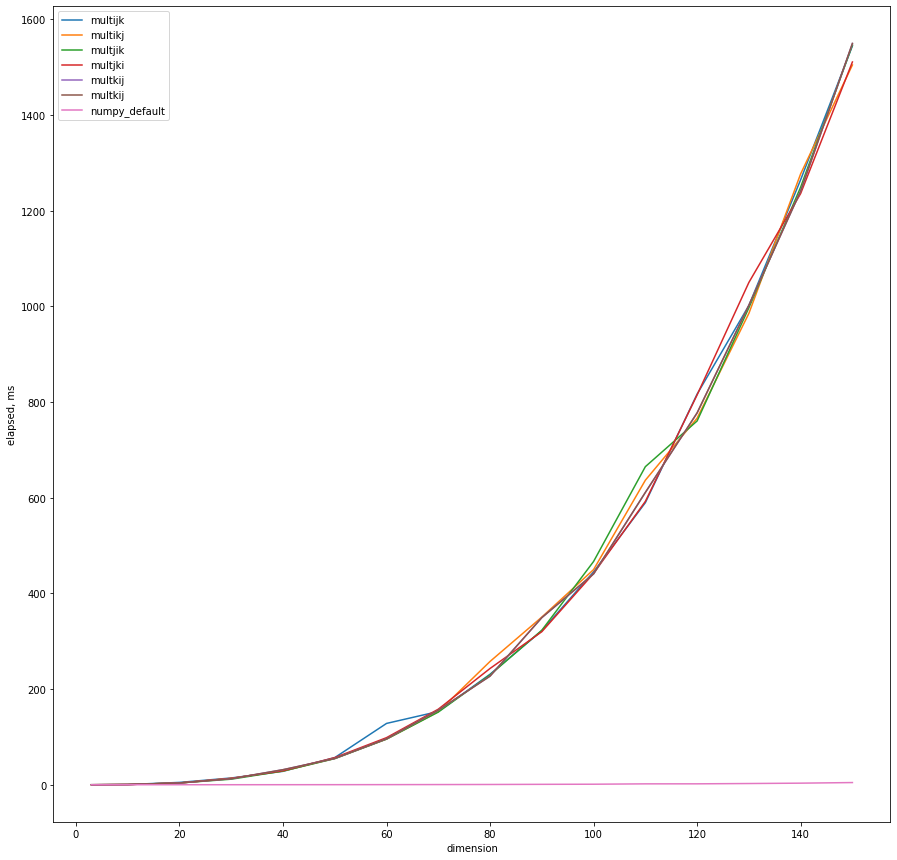

In [13]:
plt.figure()
for mult in MULT_FUNCTIONS:
    plt.plot(results["dim"], results[mult.__name__], label=mult.__name__)
plt.xlabel("dimension")
plt.ylabel("elapsed, ms")
plt.legend(loc="best")
plt.show()

На изображении ниже приведены графики работы каждой функции по отдельности. Здесь видно, что все они, включая `numpy_default`, имеют похожую зависимость времени выполнения от размерности матриц.

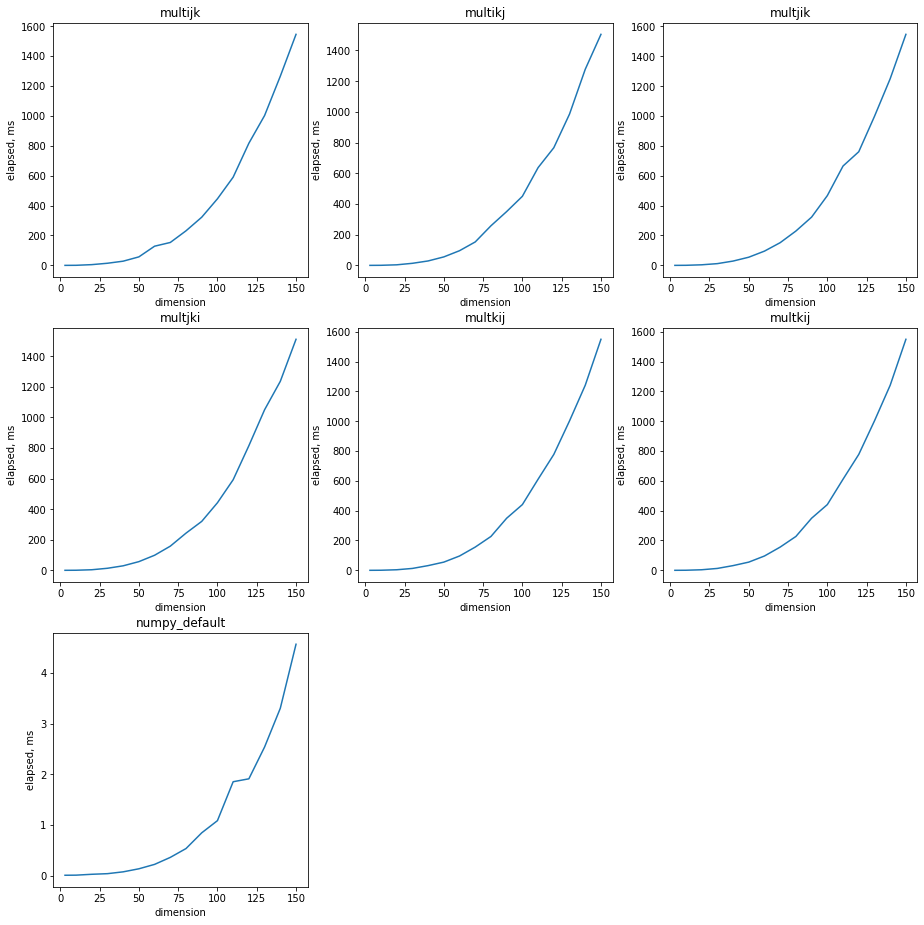

In [14]:
plt.figure()
i = 331
for mult in MULT_FUNCTIONS:
    plt.subplot(i)
    plt.title(mult.__name__)
    plt.xlabel("dimension")
    plt.ylabel("elapsed, ms")
    plt.plot(results["dim"], results[mult.__name__])
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    i += 1


По имеющимся результатам можно сказать, что среди функций `mult*` быстрее всего с увеличением размерности матриц работает `multikj`, а медленнее всего - `multjki`. Разница в скорости работы функций может быть связана с тем, что запросы данных из оперативной памяти выполняются за различное время из-за _кэширования_.

Дело в том, что при обращении в память вместе с запрашиваемыми данными процессор загружает в _кэш_ - отдельную область памяти, расположенную "близко" к ядрам процессора - и несколько соседних байт. Таким образом, при последовательном доступе к нескольким идущим в памяти друг за другом элементам произойдет _попадание_ в кэш: процессор будет использовать данные из кэша, время доступа к которым значительно меньше времени доступа к данным напрямую из оперативной памяти. Попытка доступа к элементам, которые не загружены в кэш, приведет к _промаху_: процессор сначала проверит их наличие в кэше, после чего, не обнаружив их там, обновит кэш новыми данными, загрузив требуемые элементы, а вместе с ними и соседние.

Например, если матрица хранится по строкам в виде вектора, то более оптимальным будет обход элементов, в котором на каждом шаге будет меняться столбец, а не строка:

```python
# быстрее
for i in range(2):
    for j in range(3):
        s += a[i, j]

# дольше
for j in range(3):
    for i in range(2):
        s += a[i, j]
```

Что касается `numpy_default` и оператора `@`, вызывающего под собой `numpy.matmul`, здесь вместо наивного алгоритма используются оптимальные подходы к умножению матриц, подразумевающие векторизацию и блочное умножение с применением параллелизма.